In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sci

#Creates function to remove extra spaces in sim file
def cleanlines(line):
    remove = ['  ', ' ']
    for r in remove:
        clean = line.replace(r, '') 
    split = clean.split(';')
    return split

In [2]:
#Opens sim file
data = open('FullConcreteModel.inc1.id1.sim', 'r').read()
lines = data.split('\n')

In [3]:
#infile = open('./AttenuatedConcreteModel.geo.setup', 'r')
#for l in infile:
#    pass
#     print(l.rstrip('\n'))
#infile.close()

In [4]:
#with open('./AttenuatedConcreteModel.geo.setup', 'r') as infile:
 #   for l in infile:
  #      print(l.rstrip('\n'))

In [5]:
#Creates empty array for x, y, and z value of hits
darrell_arr = np.dtype({"names": ['x_value', 'y_value','z_value'], "formats": [np.float32, np.float32, np.float32]})
xlist = []
ylist = []
zlist = []

#Tallies total hits in detector
c = 0
for l in lines:
    line  = cleanlines(l)
    #print(line[0][2:6])
    if len(line) > 1 and line[0][2:6] == 'BLAK':
        #print(line)
        c +=1
        #Tallies coordinates of hits
        xlist.append(np.float32(line[4]))
        ylist.append(np.float32(line[5]))
        zlist.append(np.float32(line[6]))
print(c)
        

useful_arr = np.zeros(len(xlist), darrell_arr)
useful_arr['x_value'] = xlist
useful_arr['y_value'] = ylist
useful_arr['z_value'] = zlist
useful_arr[:10]

357282


array([( 423.3793335 ,  619.07183838,  607.9385376 ),
       (-526.08880615, -534.53771973,  630.42669678),
       (-315.61459351, -680.3583374 ,  193.72331238),
       (-279.98440552, -695.77923584,  442.58062744),
       (-572.23248291, -484.81954956,  915.97338867),
       (-671.96838379, -333.10427856,  338.98916626),
       (-117.63224792,  740.71765137,  345.32357788),
       ( 700.10424805,  268.98706055,  514.12133789),
       (-727.98156738,  180.39625549,  334.01098633),
       ( 641.69622803, -388.23440552,  871.91436768)],
      dtype=[('x_value', '<f4'), ('y_value', '<f4'), ('z_value', '<f4')])

In [6]:
#Generates phi -180 to 180 degrees
phi = np.arctan2(useful_arr['y_value'],useful_arr['x_value'])*180/np.pi
phi[:10]

array([  55.63201904, -134.5435791 , -114.88632965, -111.92004395,
       -139.72732544, -153.63172913,   99.0236969 ,   21.01727486,
        166.08227539,  -31.1744709 ], dtype=float32)

In [7]:
#Coverts phi degrees into cm
x = phi*np.pi*750/180
x[:10]

array([  728.22143555, -1761.17138672, -1503.85852051, -1465.0300293 ,
       -1829.02636719, -2011.03466797,  1296.21716309,   275.11550903,
        2174.01196289,  -408.07287598], dtype=float32)

In [8]:
#Confirms constant r of 750 cm
r = np.sqrt(useful_arr['x_value']**2+useful_arr['y_value']**2)
r[:10]

array([ 750.        ,  750.        ,  750.00006104,  750.        ,
        750.        ,  749.99993896,  750.        ,  750.        ,
        750.        ,  750.        ], dtype=float32)

In [12]:
z = useful_arr['z_value']
z[:10]

array([ 607.9385376 ,  630.42669678,  193.72331238,  442.58062744,
        915.97338867,  338.98916626,  345.32357788,  514.12133789,
        334.01098633,  871.91436768], dtype=float32)

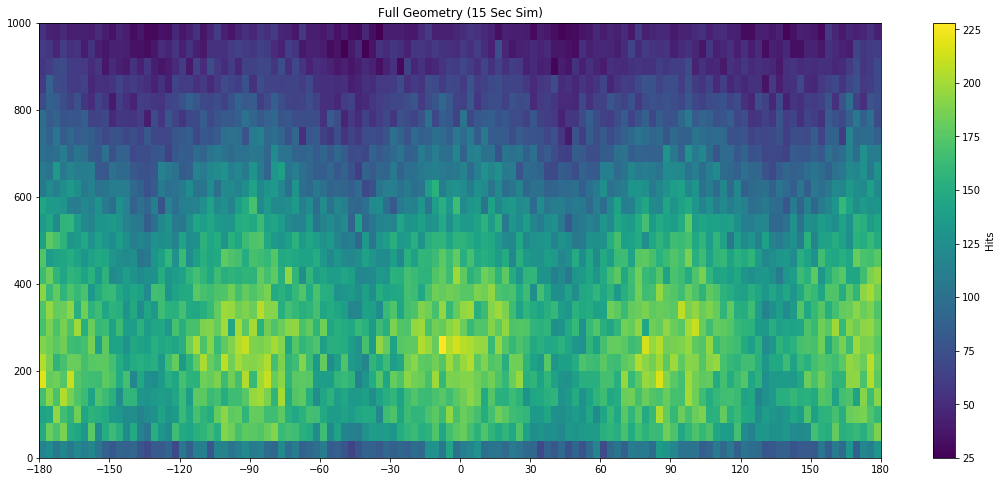

In [10]:
xedges = np.arange(-180.0, 180.1, 3.)
yedges = np.arange(0., 1000.1, 40.)
heatmap, _, __ = np.histogram2d(phi,useful_arr['z_value'], bins=[xedges, yedges])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.figure(figsize=(18.8496,8))
plt.imshow(heatmap.T, extent=extent, aspect='auto', origin='lower')
plt.xticks(np.arange(-180., 181., 30.))
# plt.xlim(100, 180)
cb = plt.colorbar()
cb.set_label('Hits')
plt.title('Full Geometry (15 Sec Sim)')
plt.savefig('Full_15sec.png')
plt.show()

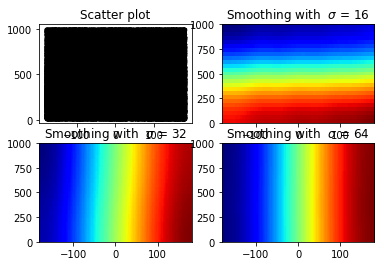

In [17]:
import matplotlib.cm as cm
from scipy.ndimage.filters import gaussian_filter


def myplot(phi,z, s, bins=[xedges, yedges]):
    heatmap, _, __ = np.histogram2d(phi,z, bins=[xedges, yedges])
    heatmap = gaussian_filter(heatmap, sigma=s)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    return heatmap.T, extent


fig, axs = plt.subplots(2, 2)


sigmas = [0, 16, 32, 64]

for ax, s in zip(axs.flatten(), sigmas):
    if s == 0:
        ax.plot(phi,z, 'k.', markersize=5)
        ax.set_title("Scatter plot")
    else:
        img, extent = myplot(phi,z, s)
        ax.imshow(img, extent=extent, origin='lower',aspect='auto', cmap=cm.jet)
        ax.set_title("Smoothing with  $\sigma$ = %d" % s)

plt.show()


In [20]:
heatmap?